In [72]:
!pip install requests hazm matplotlib seaborn

In [2]:
import requests
from bs4 import BeautifulSoup
from hazm import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re

In [87]:
# مرحله 1: دریافت محتوای سایت
def fetch_html(url):
    headers = {    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    try:
        response = requests.get(url,headers=headers)
        response.raise_for_status()
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None

# مرحله 2: پردازش متن و حذف تگهای HTML
def process_text(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    text = soup.get_text()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# مرحله 3: تکنایزینگ متن
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# مرحله 4: ویرایش وکتورها
def modify_tokens(tokens):
    modified_tokens = [token for token in tokens if token.lower() not in {'و', 'و یا', 'یا','or','and', 'not' , 'a',':','the','of','&' }]
    return modified_tokens

# مرحله 5: ایجاد ایندکس و محاسبه فرQUENCY
def create_index_and_frequency(tokens):
    index = defaultdict(list)
    frequency = defaultdict(int)

    for idx, token in enumerate(tokens):
        index[token].append(idx)
        frequency[token] += 1

    return index, frequency

# مرحله 6: مرتب سازی وکتورها بر اساس فرQUENCY
def rank_tokens(frequency):
    sorted_tokens = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    return sorted_tokens

# مرحله 7: ایجاد نمودار فرQUENCY
def plot_frequency_distribution(frequency, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(frequency.values()), y=list(frequency.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Token')
    plt.xticks(rotation=45)
    plt.show()
# مرحله 7: ایجاد نمودار فرQUENCY برای ده کلمه اول
def plot_top_10_frequency_distribution(frequency, title):
    top_10 = dict(sorted(frequency.items(), key=lambda x: x[1], reverse=True)[:10])
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(top_10.values()), y=list(top_10.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Token')
    plt.xticks(rotation=45)
    plt.show()

In [93]:
#url = 'https://karavi.ca/'
#url = 'http://alikaravi.com/'
#url = 'https://alonak.com/'
url = "https://www.bbc.com/persian/topics/ckdxnwvwwjnt"
html_content = fetch_html(url);



In [94]:
print(html_content)

<!doctype html><html lang="fa" class="no-js" dir="rtl"><head><meta data-react-helmet="true" charSet="utf-8"/><meta data-react-helmet="true" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1"/><script async="" src="https://mybbc-analytics.files.bbci.co.uk/reverb-client-js/reverb-3.9.2.js"></script><script data-react-helmet="true" type="module" src="https://gn-web-assets.api.bbc.com/ngas/latest/dotcom-bootstrap.js" async=""></script><script data-react-helmet="true" noModule="" src="https://gn-web-assets.api.bbc.com/ngas/latest/dotcom-bootstrap-legacy.js" async=""></script><link data-chunk="main" rel="" as="script" href="https://static.files.bbci.co.uk/ws/simorgh-assets/public/static/js/modern.framework-c7b45eed.708b8c94.js" crossorigin="anonymous"/><link data-chunk="main" rel="" as="script" href="https://static.files.bbci.co.uk/ws/simorgh-assets/public/static/js/modern.framework-e5bca7e4.cb41ed56.js" crossorigin="anonymous"/><link data-chunk="main" rel="" as="

In [28]:
# بارگذاری کتابخانه‌های مورد نیاز
#from google.colab import files
# بارگذاری فایل
#uploaded = files.upload()
# نمایش محتوای فایل
#for filename in uploaded.keys():
#    with open(filename, 'r', encoding='utf-8') as file:
#        html_content = file.read()

Saving karavi.ca.html to karavi.ca (2).html


In [95]:
# مرحله 1: پردازش متن
text = process_text(html_content)

In [96]:
print(text)

ایران - BBC News فارسیBBC News, فارسیمشاهده محتواصفحه هاصفحه اولبحران خاورمیانهپخش زندهویدیوتلویزیونصفحه فعلی, ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر از خبرصفحه اولبحران خاورمیانهپخش زندهویدیوتلویزیونصفحه فعلی, ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر از خبرایراندر آستانه دور چهارم مذاکرات ایران و آمریکا؛ هگست: ایران تاوان حمایت از حوثی‌ها را خواهد داد۱۵ دقیقه پیشخبررسانی فاجعه؛ چرا حکومت ایران، جنگ روایت را می‌بازد؟۱۰ اردیبهشت ۱۴۰۴ - ۳۰ آوریل ۲۰۲۵دفاع دولت ایران از نحوه اطلاع‌رسانی درباره انفجار بندر رجایی: «سانسوری در کار نیست»۱۰ اردیبهشت ۱۴۰۴ - ۳۰ آوریل ۲۰۲۵محسن لنگرنشین پس از محاکمه به اتهام «جاسوسی برای اسرائیل» اعدام شد۱۰ اردیبهشت ۱۴۰۴ - ۳۰ آوریل ۲۰۲۵هشدار عفو بین‌الملل درباره عقب‌گرد جهانی حقوق بشر؛ ایران در میان «بدترین ناقضان»۹ اردیبهشت ۱۴۰۴ - ۲۹ آوریل ۲۰۲۵شرکت توسعه خدمات دریایی و بندری سینا؛ تحریم، مانور ضدخرابکاری و انفجار «مواد خطرناک»۹ اردیبهشت ۱۴۰۴ - ۲۹ آوریل ۲۰۲۵1:22ویدیو, سوگواری برای جانباختگان بندرعباس؛ از اعتراض تا روشن کردن شمع در خیابان, مدت 1,22۹ اردیبهشت ۱۴۰۴ 

In [97]:
# مرحله 2: تکنایزینگ
tokens = tokenize_text(text)
print("\n- Tokens:", tokens)
print("\n- Tokens:", len(tokens))


- Tokens: ['ایران', '-', 'BBC', 'News', 'فارسیBBC', 'News,', 'فارسیمشاهده', 'محتواصفحه', 'هاصفحه', 'اولبحران', 'خاورمیانهپخش', 'زندهویدیوتلویزیونصفحه', 'فعلی,', 'ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر', 'از', 'خبرصفحه', 'اولبحران', 'خاورمیانهپخش', 'زندهویدیوتلویزیونصفحه', 'فعلی,', 'ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر', 'از', 'خبرایراندر', 'آستانه', 'دور', 'چهارم', 'مذاکرات', 'ایران', 'و', 'آمریکا', '؛', 'هگست', ':', 'ایران', 'تاوان', 'حمایت', 'از', 'حوثی\u200cها', 'را', 'خواهد_داد', '۱۵', 'دقیقه', 'پیشخبررسانی', 'فاجعه', '؛', 'چرا', 'حکومت', 'ایران', '،', 'جنگ', 'روایت', 'را', 'می\u200cبازد', '؟', '۱۰', 'اردیبهشت', '۱۴۰۴', '-', '۳۰', 'آوریل', '۲۰۲۵', 'دفاع', 'دولت', 'ایران', 'از', 'نحوه', 'اطلاع\u200cرسانی', 'درباره', 'انفجار', 'بندر', 'رجایی', ':', '«', 'سانسوری', 'در', 'کار', 'نیست', '»', '۱۰', 'اردیبهشت', '۱۴۰۴', '-', '۳۰', 'آوریل', '۲۰۲۵', 'محسن', 'لنگرنشین', 'پس', 'از', 'محاکمه', 'به', 'اتهام', '«', 'جاسوسی', 'برای', 'اسرائیل', '»', 'اعدام', 'شد', '۱۰', 'اردیبهشت', '۱۴۰۴',

In [98]:
# مرحله 3: ویرایش وکتورها
modified_tokens = modify_tokens(tokens)
print("\n- Modified Tokens:", modified_tokens)
print("\n- Modified Tokens:", len(modified_tokens))


- Modified Tokens: ['ایران', '-', 'BBC', 'News', 'فارسیBBC', 'News,', 'فارسیمشاهده', 'محتواصفحه', 'هاصفحه', 'اولبحران', 'خاورمیانهپخش', 'زندهویدیوتلویزیونصفحه', 'فعلی,', 'ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر', 'از', 'خبرصفحه', 'اولبحران', 'خاورمیانهپخش', 'زندهویدیوتلویزیونصفحه', 'فعلی,', 'ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر', 'از', 'خبرایراندر', 'آستانه', 'دور', 'چهارم', 'مذاکرات', 'ایران', 'آمریکا', '؛', 'هگست', 'ایران', 'تاوان', 'حمایت', 'از', 'حوثی\u200cها', 'را', 'خواهد_داد', '۱۵', 'دقیقه', 'پیشخبررسانی', 'فاجعه', '؛', 'چرا', 'حکومت', 'ایران', '،', 'جنگ', 'روایت', 'را', 'می\u200cبازد', '؟', '۱۰', 'اردیبهشت', '۱۴۰۴', '-', '۳۰', 'آوریل', '۲۰۲۵', 'دفاع', 'دولت', 'ایران', 'از', 'نحوه', 'اطلاع\u200cرسانی', 'درباره', 'انفجار', 'بندر', 'رجایی', '«', 'سانسوری', 'در', 'کار', 'نیست', '»', '۱۰', 'اردیبهشت', '۱۴۰۴', '-', '۳۰', 'آوریل', '۲۰۲۵', 'محسن', 'لنگرنشین', 'پس', 'از', 'محاکمه', 'به', 'اتهام', '«', 'جاسوسی', 'برای', 'اسرائیل', '»', 'اعدام', 'شد', '۱۰', 'اردیبهشت', '۱۴۰۴', '-', 

In [99]:
# مرحله 4: ایجاد ایندکس و محاسبه فرQUENCY
index, frequency = create_index_and_frequency(modified_tokens)
print("\n- Index:", dict(index))
print("\n- Index:", len(dict(index)))


- Index: {'ایران': [0, 27, 31, 45, 61, 112, 177, 233, 289, 334, 439, 461, 485, 490], '-': [1, 55, 78, 99, 122, 145, 169, 196, 222, 242, 259, 282, 299, 324, 345, 361, 380, 405, 431, 457, 473, 500, 526], 'BBC': [2], 'News': [3], 'فارسیBBC': [4], 'News,': [5, 535], 'فارسیمشاهده': [6], 'محتواصفحه': [7], 'هاصفحه': [8], 'اولبحران': [9, 16], 'خاورمیانهپخش': [10, 17], 'زندهویدیوتلویزیونصفحه': [11, 18], 'فعلی,': [12, 19], 'ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر': [13, 20], 'از': [14, 21, 34, 62, 85, 155, 178, 290, 387, 443, 506, 532], 'خبرصفحه': [15], 'خبرایراندر': [22], 'آستانه': [23], 'دور': [24, 482], 'چهارم': [25], 'مذاکرات': [26, 438, 451, 484], 'آمریکا': [28, 231, 440, 462, 486], '؛': [29, 42, 111, 132, 154, 203, 308, 351, 418, 441, 480, 511], 'هگست': [30], 'تاوان': [32], 'حمایت': [33], 'حوثی\u200cها': [35], 'را': [36, 49, 234], 'خواهد_داد': [37], '۱۵': [38, 212], 'دقیقه': [39], 'پیشخبررسانی': [40], 'فاجعه': [41, 286], 'چرا': [43], 'حکومت': [44], '،': [46, 134, 515], 'جنگ': [47], 'روای

<ipython-input-87-b356de0cf263>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequency.values()), y=list(frequency.keys()), palette='viridis')


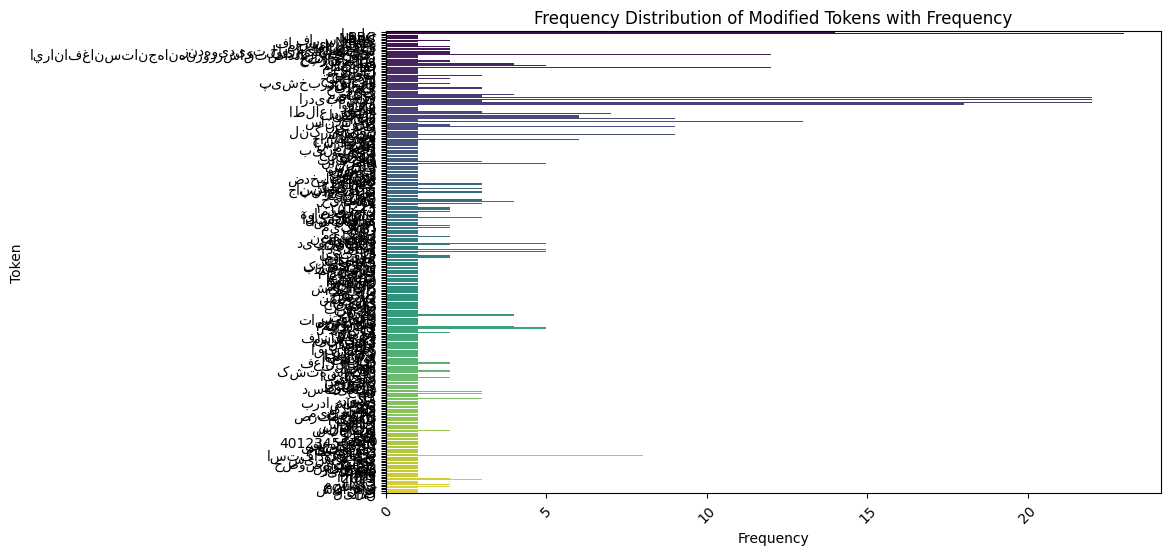

In [100]:
plot_frequency_distribution(frequency, "Frequency Distribution of Modified Tokens with Frequency")

<ipython-input-87-b356de0cf263>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_10.values()), y=list(top_10.keys()), palette='viridis')


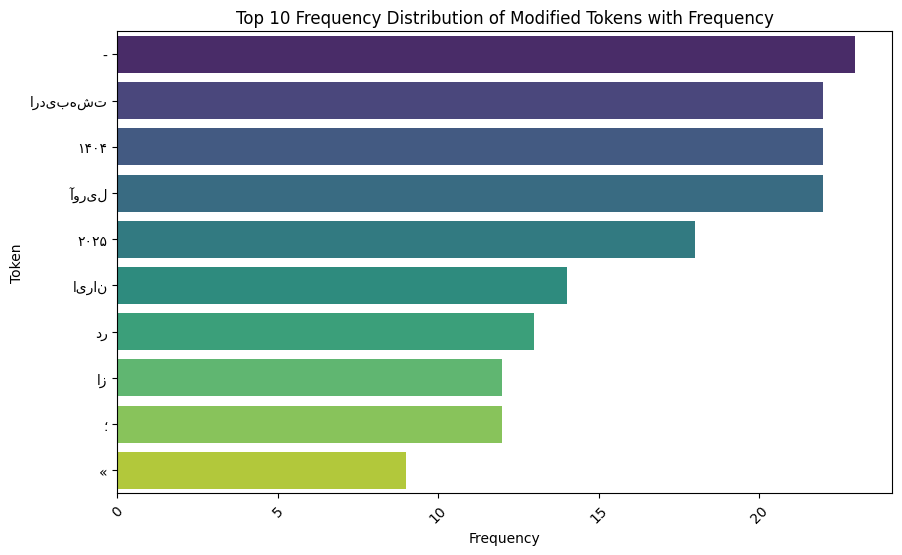

In [101]:
plot_top_10_frequency_distribution(frequency, "Top 10 Frequency Distribution of Modified Tokens with Frequency")

In [102]:
# مرحله 5: مرتب سازی وکتورها
ranked_tokens = rank_tokens(frequency)
print("\n- Ranked Tokens:", ranked_tokens)


- Ranked Tokens: [('-', 23), ('اردیبهشت', 22), ('۱۴۰۴', 22), ('آوریل', 22), ('۲۰۲۵', 18), ('ایران', 14), ('در', 13), ('از', 12), ('؛', 12), ('«', 9), ('»', 9), ('به', 9), ('بی', 8), ('انفجار', 7), ('بندر', 6), ('رجایی', 6), ('برای', 6), ('آمریکا', 5), ('۲۹', 5), ('با', 5), ('۸', 5), ('۲۸', 5), ('۲۷', 5), ('مذاکرات', 4), ('؟', 4), ('1', 4), ('توافق', 4), ('۷', 4), ('را', 3), ('،', 3), ('۱۰', 3), ('۳۰', 3), ('درباره', 3), ('۹', 3), ('ویدیو,', 3), ('بندرعباس', 3), ('تا', 3), ('مدت', 3), (',', 3), ('آتش\u200cسوزی', 3), ('۶', 3), ('۲۶', 3), ('دیگر', 3), ('.', 3), ('News,', 2), ('اولبحران', 2), ('خاورمیانهپخش', 2), ('زندهویدیوتلویزیونصفحه', 2), ('فعلی,', 2), ('ايرانافغانستانجهانهنرورزشاقتصاددانشفراتر', 2), ('دور', 2), ('۱۵', 2), ('فاجعه', 2), ('نیست', 2), ('سازمان', 2), ('مدیریت', 2), ('بحران', 2), ('مهار', 2), ('کامل', 2), ('نتانیاهو', 2), ('ترامپ', 2), ('چیست', 2), ('چه', 2), ('شهید', 2), ('ادامه', 2), ('۲۵', 2), ('پایان', 2), ('نه', 2), ('سی', 2), ('سایت', 2), ('های', 2), ('BBC', 1), ('N